In [1]:
from DeNN.model import resnet
from DeNN.dataset_loader import data_loader, data_augmentation
from DeNN.trainer import trainer
from DeNN.visualization import * 
from DeNN.util import *

In [2]:
import torch,torchvision
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms.functional import normalize, resize, to_tensor, to_pil_image
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [3]:
DATA_PATH = 'D:/Github/Dataset/'
BATCH_SIZE =128

In [4]:
my_transformations = data_augmentation.DataAugmentationCifar10_album()
train, test = data_loader.DatasetCifar10(data_path = DATA_PATH,transformations = my_transformations,batch_size = BATCH_SIZE).load_data()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = resnet.ResNet18().to(device)

In [7]:
summary(model,input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min')
# trainer = trainer.Trainer( model =model , optimizer =optimizer , device =device , train_loader = train, test_loader = test,epochs = 1,criteria = criterion)

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.15E+00


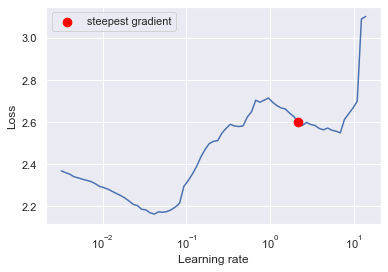

In [9]:
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train, end_lr=100, num_iter=100)
my_plt,lr_val = lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [10]:
lr_val

2.154434690031883

In [11]:
optimizer = optim.SGD(model.parameters(), lr=lr_val, momentum=0.9)

In [12]:
trainer = trainer.Trainer( model =model , optimizer =optimizer , device =device , train_loader = train, test_loader = test,epochs = 5,criteria = criterion,scheduler = scheduler)

In [13]:
(w,x),(y,z) = trainer.train()

loss=2.454167127609253 batch_id=0 Accuracy = 0.0002:   0%|                                     | 0/391 [00:00<?, ?it/s]

Epoch: 1


loss=2.332907199859619 batch_id=390 Accuracy = 0.09898: 100%|████████████████████████| 391/391 [00:36<00:00, 10.65it/s]
loss=2.3714723587036133 batch_id=0 Accuracy = 0.00018:   0%|                                   | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 1001/10000 (10.01%)

Epoch: 2


loss=2.31732439994812 batch_id=390 Accuracy = 0.10106: 100%|█████████████████████████| 391/391 [00:36<00:00, 10.64it/s]
loss=2.326927423477173 batch_id=0 Accuracy = 0.00022:   0%|                            | 1/391 [00:00<00:39,  9.93it/s]


Test set: Average loss: 0.0187, Accuracy: 1001/10000 (10.01%)

Epoch: 3


loss=2.3209965229034424 batch_id=390 Accuracy = 0.10068: 100%|███████████████████████| 391/391 [00:36<00:00, 10.68it/s]
loss=2.3016207218170166 batch_id=1 Accuracy = 0.00062:   0%|                           | 1/391 [00:00<00:40,  9.73it/s]


Test set: Average loss: 0.0187, Accuracy: 1003/10000 (10.03%)

Epoch: 4


loss=2.3344035148620605 batch_id=390 Accuracy = 0.09894: 100%|███████████████████████| 391/391 [00:36<00:00, 10.65it/s]
loss=2.3531265258789062 batch_id=1 Accuracy = 0.00046:   0%|                                   | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 1083/10000 (10.83%)

Epoch: 5


loss=2.3513472080230713 batch_id=390 Accuracy = 0.09956: 100%|███████████████████████| 391/391 [00:36<00:00, 10.63it/s]



Test set: Average loss: 0.0185, Accuracy: 1030/10000 (10.30%)



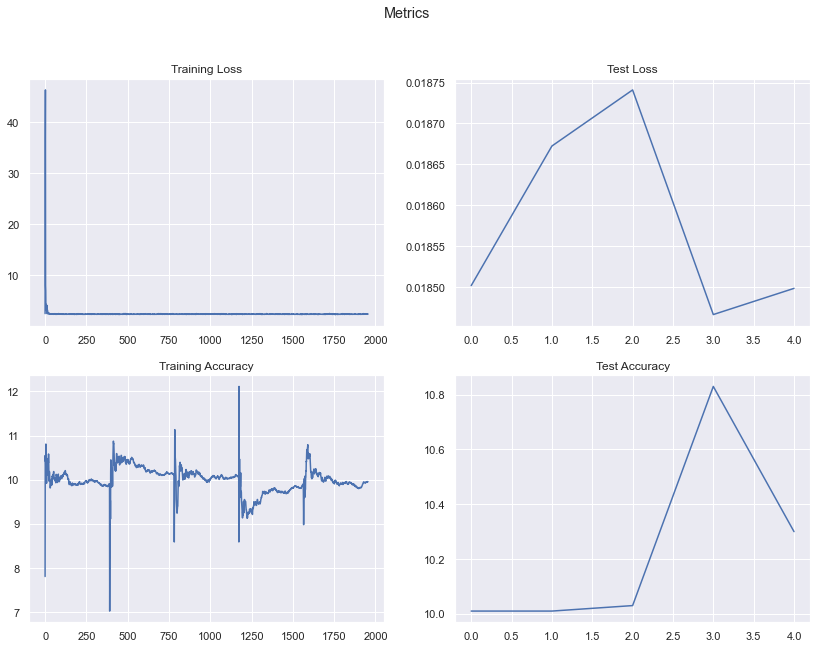

In [14]:
plot_metrics(w,y,x,z)

In [15]:
gcam_layers, predicted_probs, predicted_classes,data,target = load_gradcam(test, model, device, target_layers)
mns_obj = data_augmentation.Dataset_Mean_and_std()
mean,std = mns_obj.mean_and_std('cifar10')
denorm = DeNorm(mean=mean, std=std)

NameError: name 'target_layers' is not defined

In [ ]:
gcam_layers, predicted_probs, predicted_classes,data,target = load_gradcam(test, model, device, target_layers,classified = False)
plot_gradcam(gcam_layers, data, target, predicted_classes,classes, denorm)